# Algorithm 3: Incremental

```
1. Start by the first 2 points, construct a line
2. Add the next point to the current line model
3. Recompute the line parameters by line fitting
4. If it satisfies the line condition, continue (go to step 2)
5. Otherwise, put back the last point, recompute the line parameters, return the line 
6. Continue with the next two points, go to step 2
```

## Reference

Roland Siegwart, Illah Nourbakhsh, and Davide Scaramuzza. Introduction to Autonomous Mobile Robots. MIT Press, 2nd edition, 2011.

```
Put all points on curve list, in order along the curve 
Empty the line point list
Empty the line list
Until there are too few points on the curve
  Transfer first few points on the curve to the line point list Fit line to line point list
  While fitted line is good enough
    Transfer the next point on the curve to the line point list and refit the line
  end
  Transfer last point(s) back to curve 
  Refit line
  Attach line to line list
end
```

## Reference
Forsyth, D. A., Ponce, J., Computer Vision: A Modern Approach. Upper Saddle River, NJ, Prentice Hall, 2003.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from Incremental.incremental import Incremental

In [2]:
testdata = []
for i in range(6):
    with open('/Users/hdumcke/git/lidar-simulator/jupyternb/data/testLineExtraction%s.mat.pickle' % str(i+1), 'rb') as f:
        testdata.append(pickle.load(f))

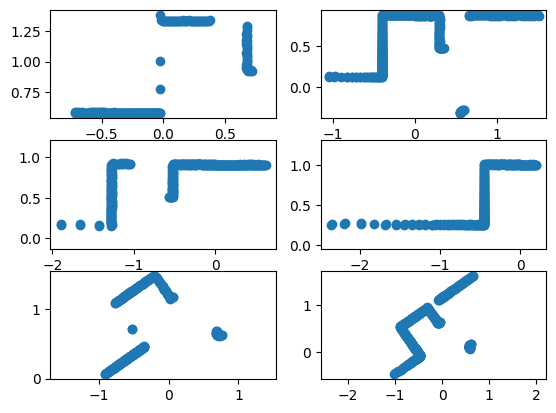

In [3]:
fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    axs[row_index, column_index].scatter(x, y)

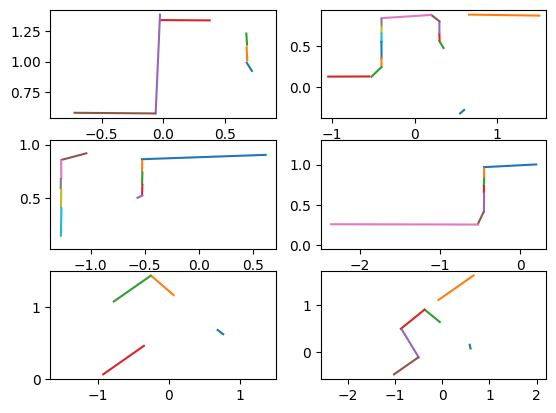

In [17]:
inc = Incremental(dist_threshold=0.05, min_points_per_segment=5)

fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    segend, seglen, pointIdx_a = inc.extractLines(x[0], y[0])
    for j in range(segend.shape[0]):
        axs[row_index, column_index].plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [5]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("rectangle.stl")

In [6]:
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)

In [7]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

/Users/hdumcke/git/lidar-simulator/python/incremental/src/Incremental/incremental.py:20: RuntimeWarning: invalid value encountered in scalar divide
  m = (X_d * Y_d).sum() / X_d_2.sum()


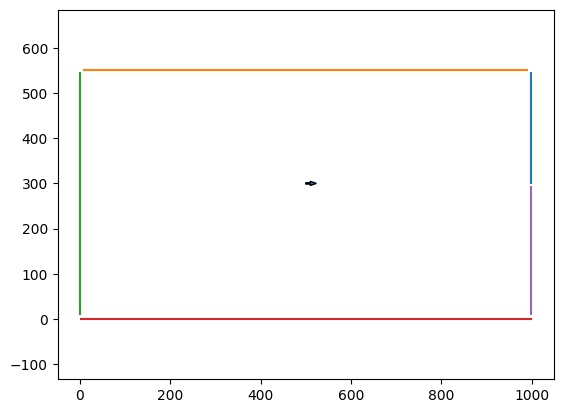

In [8]:
inc = Incremental()

fig,ax = plt.subplots()
ax.axis('equal')
plt.arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
#plt.scatter (x[212:330], y[212:330])
segend, seglen, pointIdx_a = inc.extractLines(x, y)
for j in range(segend.shape[0]):
    ax.plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [9]:
import Utilities.utilities as utilities

In [10]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("maze.stl")
triangles = lidar.get_map_triangles()
point = [25, 25]
yaw = np.radians(90)

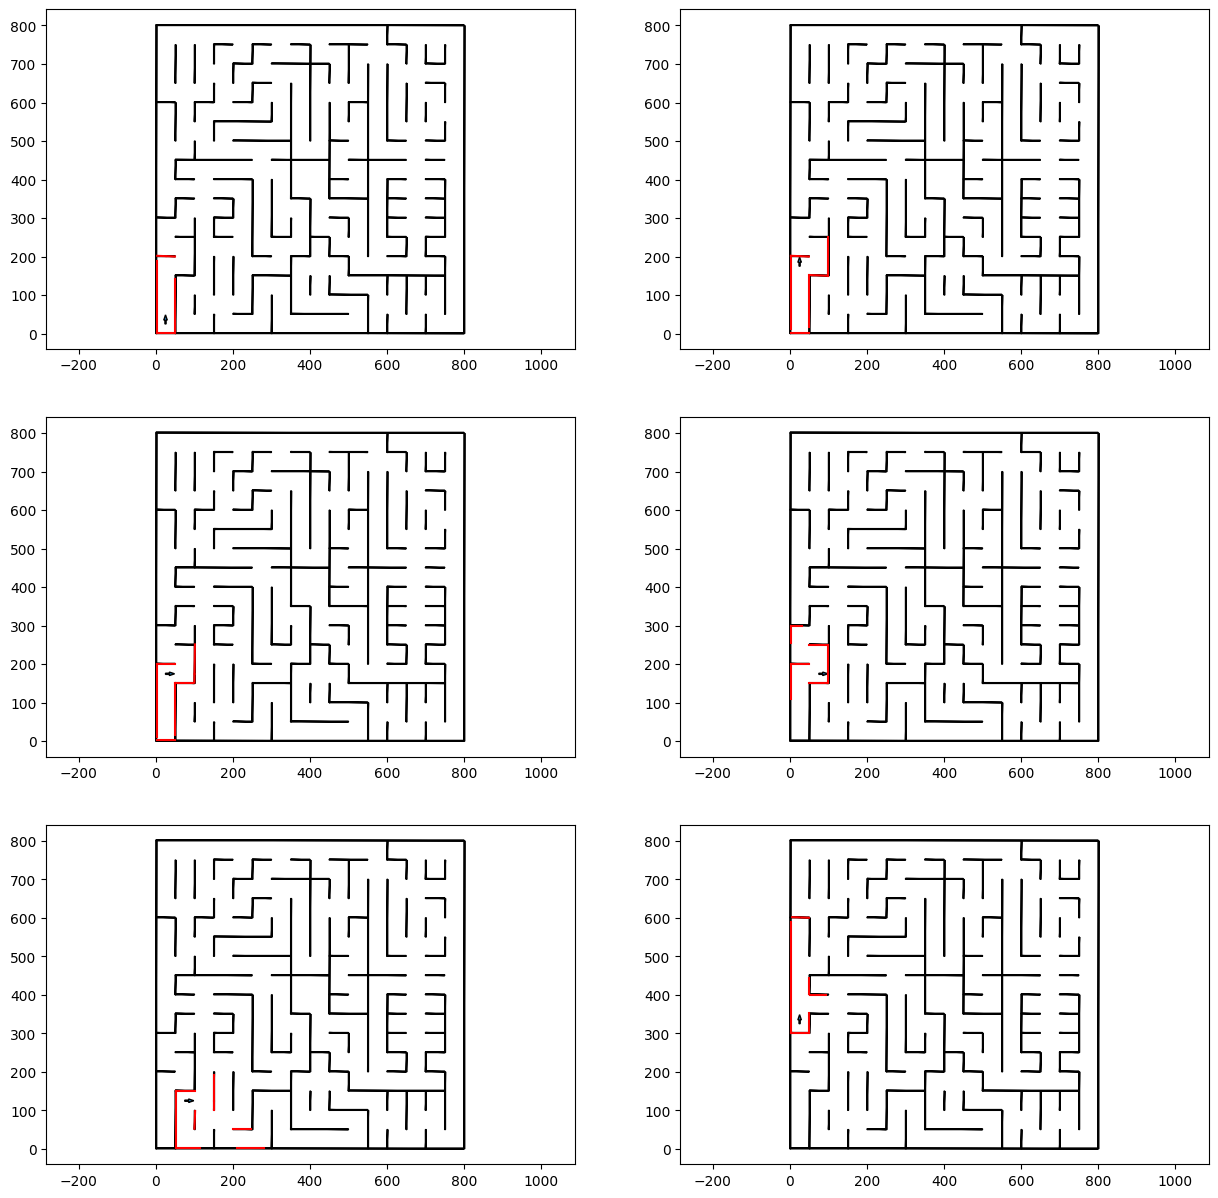

In [11]:
pose = [[25, 25, 90 ],
        [25, 175, 90 ],
        [25, 175, 0 ],
        [75, 175, 0 ],
        [75, 125, 0 ],
        [25, 325, 90 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    inc = Incremental()

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    segend, seglen, pointIdx_a = inc.extractLines(x, y)
    for j in range(segend.shape[0]):
        x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)

In [12]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("racetrack.stl")
triangles = lidar.get_map_triangles()
yaw = np.radians(180)

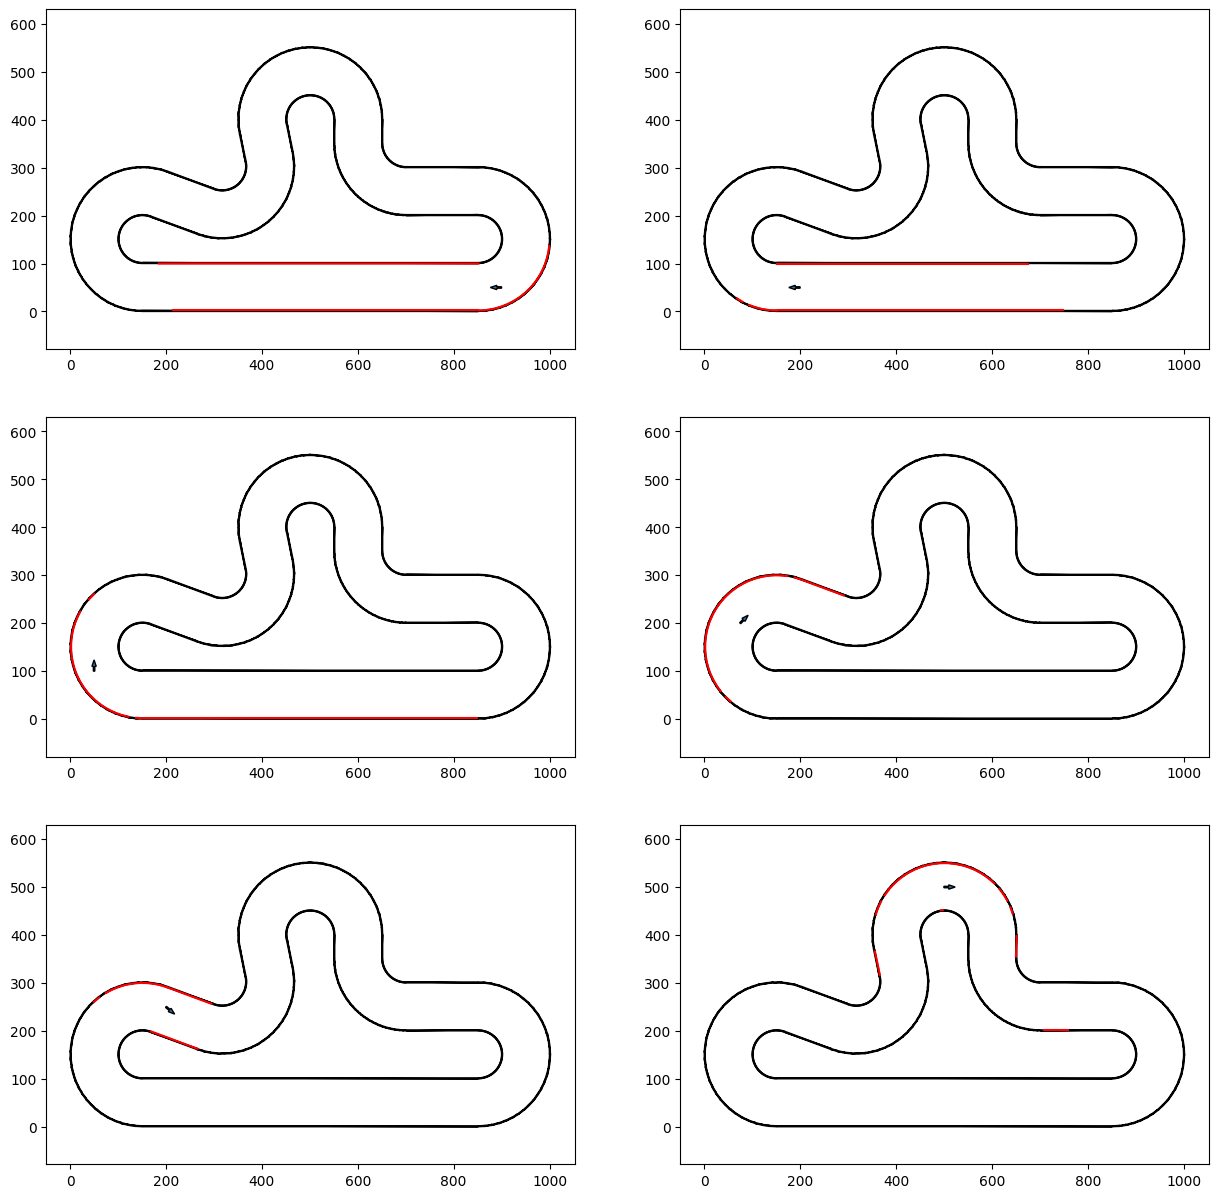

In [13]:
pose = [[900, 50, 180 ],
        [200, 50, 180 ],
        [50, 100, 90 ],
        [75, 200, 45 ],
        [200, 250, -40 ],
        [500, 500, 0 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    inc = Incremental()

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    segend, seglen, pointIdx_a = inc.extractLines(x, y)
    for j in range(segend.shape[0]):
        x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)